# Importation and data preparation

- Importation

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import math
import sklearn 
from keras.models import Sequential
from keras import optimizers
import keras.backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense

STEP 1 : Importing and Feature Scaling

- Our dataset is not yet a scaled value, so we will scale our data using StandardScaler
- We will split the data into training and testing sets. We train the model with 70% of the samples and test with the remaining 20%

In [2]:
# import data
df=pd.read_csv("C:/Users/Dell 7470/Desktop/test_xcelerit/data_xcelerit.csv")
#data
x = df.drop('vola',axis=1)
y = df.vola
#spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [3]:
# scalling train and test data set
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Building NN model

- We will create a baseline neural network model using Keras and sklearn
   - baseline_model() is a function to create our model. It is a sequential model that has two fully connected hidden layers. The first is with the same number of neurons as input attributes (7). The second is with 6 neurones and with relu activation. 
   - We will use the officient ADAM optimization algorithm.

In [4]:
def baseline_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='linear',kernel_regularizer = 'l2',  kernel_initializer='normal'))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

- We will pass baseline_model function to the KerasRegressor class by the build_fn argument. We will also pass in additional arguments of nb_epoch=5 and batch_size=10. These are automatically bundled up and passed on to the fit() function.
- We will use 10-fold cross validation to evaluate the model.

In [22]:
def train_data_nn(x_train, y_train):
    
    # Using the Keras wrapper object KerasRegressor
    estimator = KerasRegressor(build_fn=baseline_model, epochs=5, batch_size=10, verbose=1)
    
    # Cross validation
    kfold = KFold(n_splits=10, random_state=42)
    results = cross_val_score(estimator, x_train, y_train, cv=kfold , scoring='r2')  
    
    #print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))
    return estimator , results

In [23]:
model , results= train_data_nn(x_train, y_train)

Epoch 1/5
630/630 [==============================] - 1s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 59.9636 - cosine_proximity: -0.9683
Epoch 2/5
630/630 [==============================] - 0s 171us/step - loss: 0.0021 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 32.2989 - cosine_proximity: -1.0000
Epoch 3/5
630/630 [==============================] - 0s 174us/step - loss: 0.0017 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 30.1964 - cosine_proximity: -1.0000
Epoch 4/5
630/630 [==============================] - 0s 211us/step - loss: 0.0015 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 26.9064 - cosine_proximity: -1.0000
Epoch 5/5
70/70 [==============================] - 0s 3ms/step
Epoch 1/5
630/630 [==============================] - 1s 2ms/step - loss: 0.0076 - mean_squared_

In [24]:
# Training our model on our train data and validate it 
history = model.fit(x_train, y_train, validation_split=0.1, epochs=5, batch_size=10,verbose=1)


Train on 630 samples, validate on 70 samples
Epoch 1/5
630/630 [==============================] - 2s 3ms/step - loss: 0.0075 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 59.4825 - cosine_proximity: -0.9793 - val_loss: 0.0017 - val_mean_squared_error: 0.0014 - val_mean_absolute_error: 0.0291 - val_mean_absolute_percentage_error: 29.5970 - val_cosine_proximity: -1.0000
Epoch 2/5
630/630 [==============================] - 0s 163us/step - loss: 0.0023 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 32.7852 - cosine_proximity: -1.0000 - val_loss: 0.0013 - val_mean_squared_error: 9.9803e-04 - val_mean_absolute_error: 0.0260 - val_mean_absolute_percentage_error: 32.4063 - val_cosine_proximity: -1.0000
Epoch 3/5
630/630 [==============================] - 0s 150us/step - loss: 0.0019 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 30.6580 - cosine_proximity: 

# Evaluating the model

In [33]:
def visualize_learning_curve(history ,results):

    # Evaluate the model by cross validation 
    plt.figure(figsize=(10.7,5.27))
    plt.plot(results)
    plt.title('Curve of R2')
    plt.show()
    
    # summarize history for MRSE
    plt.figure(figsize=(10.7,5.27))
    plt.plot(history.history['mean_squared_error'])
    plt.title('MRSE')
    plt.ylabel('MRSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

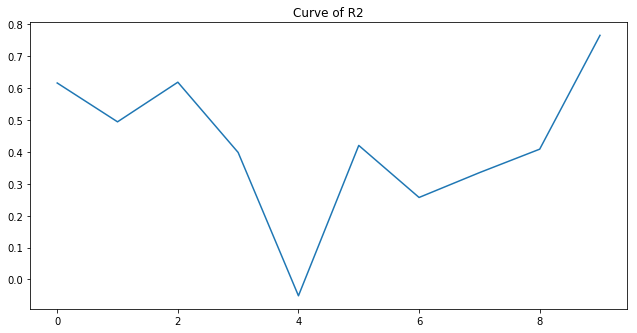

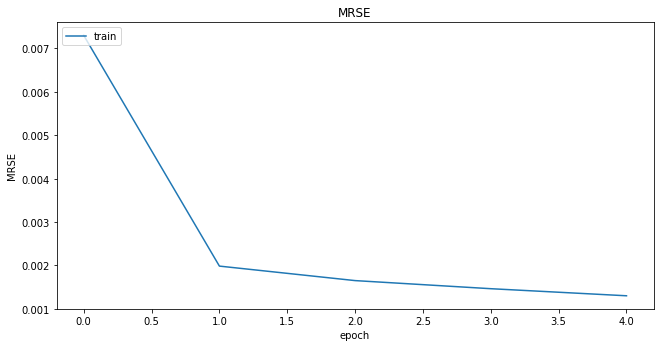

300/300 [==============================] - 0s 116us/step
 RMSE :  0.03394695995540962


In [34]:
visualize_learning_curve(history, results)

# Print RSME
rmse = math.sqrt(mean_squared_error(y_test, model.predict(x_test)))
print(' RMSE : ', rmse)


# Saving the model

In [29]:
import pickle
import os

path=input('Print your path to save your model :')
pickle.dump(model, open(os.path.join(path, 'NN.pickle'), 'wb'), protocol=4)
pickle.dump(scaler, open(os.path.join(path, 'NN_scaler.pickle'), 'wb'), protocol=4)


Print your path to save your model :C:/Users/Dell 7470/Desktop/test_xcelerit
